In [1]:
from deep_learning_models import *
from helper.dataset_reader import read_tsv
from helper.data_transformer import *
from sklearn.model_selection import train_test_split
from utils import *
import pandas as pd

In [2]:
print('Tensorflow version:', tf.__version__)
print('GPU detected:', tf.config.list_physical_devices('GPU'))

Tensorflow version: 2.9.0
GPU detected: []


In [3]:
merged_data = read_tsv('../../dataset/comlid-data-140422-v1.tsv')

train_data = read_tsv('../../dataset/train.tsv')
val_data = read_tsv('../../dataset/val.tsv')
test_data = read_tsv('../../dataset/test.tsv')

In [4]:
X_train, y_train = input_converter(merged_data, train_data)
X_val, y_val = input_converter(merged_data, val_data)
X_test, y_test = input_converter(merged_data, test_data)

In [5]:
df = list_to_dataframe(merged_data)

In [6]:
words = get_unique_words(df)
tags = get_unique_tags(df)

In [7]:
num_words = len(words)
num_tags = len(tags)
max_len = 100
model = blstm_model(num_words, num_tags, max_len)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 50)           1344500   
                                                                 
 spatial_dropout1d (SpatialD  (None, 100, 50)          0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 100, 200)         120800    
 l)                                                              
                                                                 
 time_distributed (TimeDistr  (None, 100, 7)           1407      
 ibuted)                                                         
                                                             

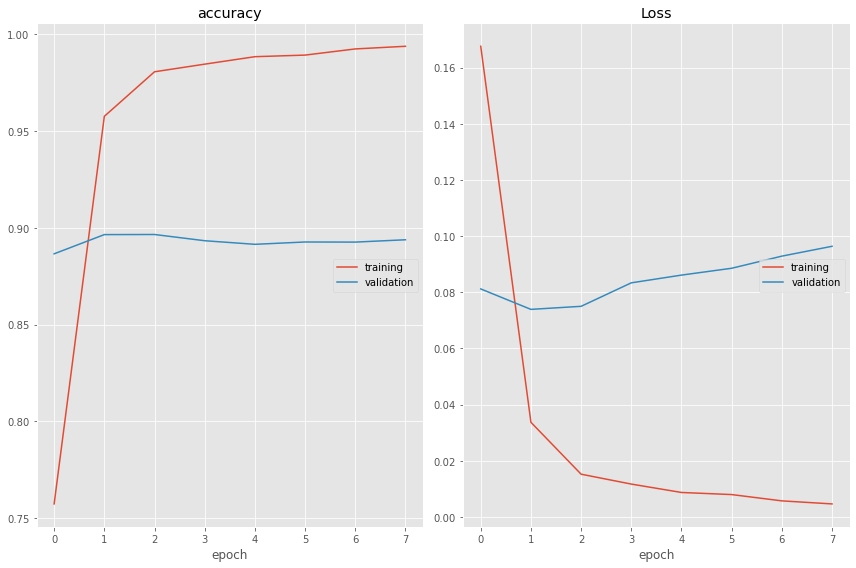

accuracy
	training         	 (min:    0.757, max:    0.994, cur:    0.994)
	validation       	 (min:    0.887, max:    0.897, cur:    0.894)
Loss
	training         	 (min:    0.005, max:    0.168, cur:    0.005)
	validation       	 (min:    0.074, max:    0.096, cur:    0.096)

Epoch 8: val_loss did not improve from 0.07392
56/56 [==============================] - 2s 27ms/step - loss: 0.0921 - accuracy: 0.8927
[0.09213001281023026, 0.8927465677261353]


In [8]:
root_path = 'model/'
model_name = 'blstm_model_v2.h5'
num_epoch = 50
callbacks = get_callbacks(root_path, model_name)

history = model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    epochs=num_epoch,
    callbacks=callbacks,
    verbose=1
)

print(model.evaluate(X_test, y_test))

In [9]:
from keras.models import load_model

mdl = load_model('model/blstm_model_v2.h5')

In [10]:
all_w_pair = []
all_true_pair = []
all_pred_pair = []

for i in range(len(X_test)):
    p = mdl.predict(np.array([X_test[i]]))
    p = np.argmax(p, axis=-1)
    y_true = y_test[i]
    w_pair = []
    true_pair = []
    pred_pair = []
    for w, true, pred in zip(X_test[i], y_true, p[0]):
        if words[w-1] != "ENDPAD":
            # print("{:30}{:10}\t{}".format(words[w-1], tags[true], tags[pred]))
            w_pair.append(words[w-1])
            true_pair.append(tags[true])
            pred_pair.append(tags[pred])
    all_w_pair.append(w_pair)
    all_true_pair.append(true_pair)
    all_pred_pair.append(pred_pair)

1/1 [==============================] - 0s 24ms/step


In [11]:
all_true_pair

[['ID',
  'ID',
  'EN',
  'ID',
  'O',
  'O',
  'ID',
  'ID',
  'ID',
  'ID',
  'ID',
  'ID',
  'ID',
  'ID',
  'ID',
  'O',
  'ID',
  'ID',
  'EN',
  'ID',
  'ID',
  'EN',
  'EN',
  'O'],
 ['O',
  'O',
  'EN',
  'EN',
  'EN',
  'O',
  'EN',
  'EN',
  'EN',
  'EN',
  'EN',
  'EN',
  'EN',
  'EN',
  'EN',
  'O',
  'EN',
  'EN',
  'EN',
  'ID',
  'ID',
  'ID',
  'ID',
  'ID',
  'EN',
  'O',
  'ID',
  'ID',
  'ID',
  'O',
  'O',
  'EN',
  'EN',
  'EN',
  'O',
  'EN',
  'EN',
  'EN',
  'O',
  'O',
  'ID',
  'ID',
  'ID',
  'ID',
  'ID',
  'ID',
  'ID',
  'O',
  'EN'],
 ['ID',
  'O',
  'ID',
  'ID',
  'ID',
  'ID',
  'ID',
  'O',
  'ID',
  'ID',
  'ID',
  'ID',
  'ID',
  'ID',
  'ID',
  'EN',
  'ID',
  'MIX-ID-EN',
  'ID',
  'ID',
  'O'],
 ['O',
  'O',
  'EN',
  'EN',
  'JV',
  'O',
  'JV',
  'JV',
  'ID',
  'O',
  'O',
  'O',
  'ID',
  'JV',
  'ID',
  'ID',
  'ID',
  'O',
  'ID',
  'JV',
  'JV',
  'JV',
  'JV',
  'ID',
  'O',
  'JV',
  'JV',
  'JV',
  'EN',
  'JV',
  'JV',
  'JV',
  'O',
 

In [12]:
true_flat = [item for sublist in all_true_pair for item in sublist]
pred_flat = [item for sublist in all_pred_pair for item in sublist]

              precision    recall  f1-score   support

          ID       0.89      0.96      0.92     22315
          JV       0.85      0.84      0.85      4912
          EN       0.90      0.83      0.86      5017
   MIX-ID-EN       0.97      0.82      0.89       973
   MIX-ID-JV       0.94      0.81      0.87       280
   MIX-JV-EN       0.93      0.84      0.88       277
           O       0.91      0.83      0.87     10150

    accuracy                           0.90     43924
   macro avg       0.91      0.85      0.88     43924
weighted avg       0.90      0.90      0.89     43924



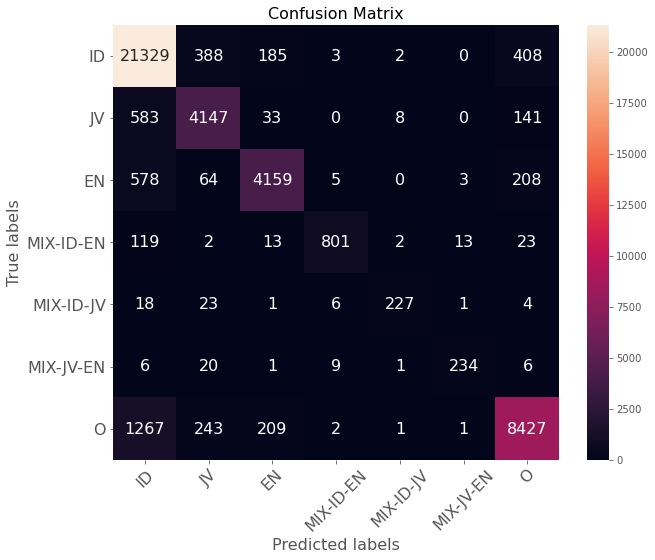

In [13]:
performance_report(true_flat, pred_flat)

In [14]:
df_ = pd.DataFrame({
    'word': all_w_pair,
    'true': all_true_pair,
    'pred': all_pred_pair
})

In [15]:
token_true_pred = []
for index, row in df_.iterrows():
    pair = list(zip(row['word'], row['true'], row['pred']))
    token_true_pred.append(pair)

In [16]:
true_pred_file = 'tagging_result/compare_results_v2.tsv'
with open(true_pred_file, "a", encoding='utf-8') as f:
    f.write("Word" + "\t" + "True" + "\t" + "Predict" + "\n")

    for index, row in df_.iterrows():
        for tkn, t_true, t_pred in (zip(row['word'], row['true'], row['pred'])):
            f.write(tkn + '\t' + t_true + '\t' + t_pred + '\n')
        f.write('\n')

f.close()

In [17]:
i = np.random.randint(0, X_test.shape[0]) #659
p = mdl.predict(np.array([X_test[i]]))
p = np.argmax(p, axis=-1)
y_true = y_test[i]
print("{:30}{:10}\t {}\n".format("Word", "True", "Pred"))
print("-" *60)

for w, true, pred in zip(X_test[i], y_true, p[0]):
    if words[w-1] != "ENDPAD":
        print("{:30}{:10}\t{}".format(words[w-1], tags[true], tags[pred]))

1/1 [==============================] - 0s 25ms/step
Word                          True      	 Pred

------------------------------------------------------------
oyi                           JV        	JV
rek                           JV        	JV
penjual                       ID        	ID
ayam                          ID        	ID
potong                        ID        	ID
di                            ID        	ID
pasar                         ID        	ID
itu                           ID        	ID
mau                           ID        	ID
apa                           ID        	ID
engga                         ID        	ID
ya                            ID        	ID
kalo                          ID        	ID
misal                         ID        	ID
kita                          ID        	ID
beline                        MIX-ID-JV 	MIX-ID-JV
fillet                        EN        	ID
?                             O         	O
spill                         EN        	